<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/HW1/Q2/HW1_Q2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-d10628ffd9c0>:32: RuntimeWarning: overflow encountered in square
  train_error = np.mean((y_train - y_train_pred) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-2-d10628ffd9c0>:33: RuntimeWarning: overflow encountered in square
  test_error = np.mean((y_test - y_test_pred) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-2-d10628ffd9c0>:29: RuntimeWarning: invalid value encountered in multiply
  y_test_pred = w1 * X_test + w0
<ipython-input-2-d10628ffd9c0>:44: RuntimeWarning: invalid value encountered in scalar subtract
  w1 -= learning_rate * w1_grad


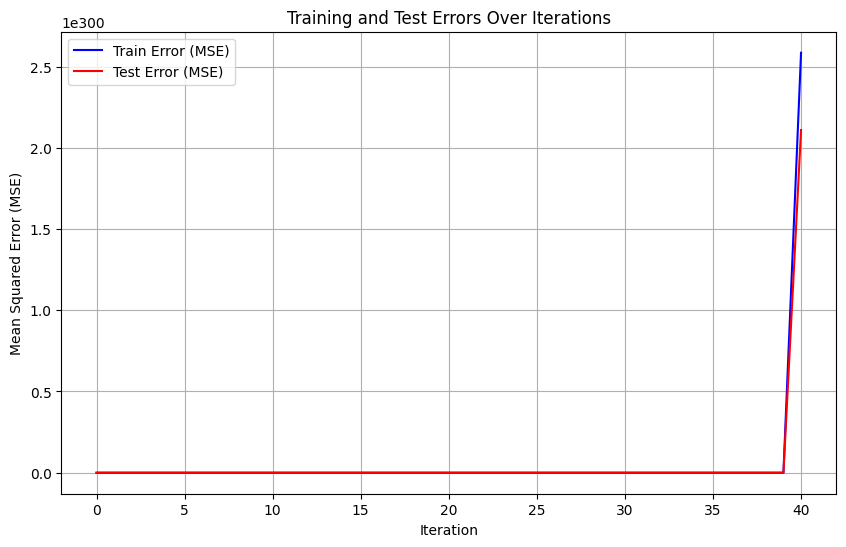

(nan, nan, nan, nan)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = np.load('/content/data.npy', allow_pickle=True)

# تقسیم داده‌ها به آموزش و آزمون
X = np.arange(len(data)).reshape(-1, 1)  # ویژگی‌ها (همچنین می‌توان آن را به عنوان یک ویژگی دیگر در نظر گرفت)
y = data  # مقادیر هدف

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# متغیرها برای ذخیره خطاها
train_errors = []
test_errors = []

# آموزش مدل در چند Iteration (دور)
iterations = 1000
learning_rate = 0.01

# مدل رگرسیون خطی
w0 = 0  # عرض از مبدأ
w1 = 0  # شیب
for i in range(iterations):
    # پیش‌بینی‌های مدل
    y_train_pred = w1 * X_train + w0
    y_test_pred = w1 * X_test + w0

    # محاسبه خطاها (MSE)
    train_error = np.mean((y_train - y_train_pred) ** 2)
    test_error = np.mean((y_test - y_test_pred) ** 2)

    # ذخیره خطاها
    train_errors.append(train_error)
    test_errors.append(test_error)

    # محاسبه گرادیان‌ها
    w1_grad = -2 * np.sum((y_train - y_train_pred) * X_train) / len(X_train)
    w0_grad = -2 * np.sum(y_train - y_train_pred) / len(X_train)

    # به روزرسانی ضرایب
    w1 -= learning_rate * w1_grad
    w0 -= learning_rate * w0_grad

# رسم نمودار خطاها
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_errors, label="Train Error (MSE)", color="blue")
plt.plot(range(iterations), test_errors, label="Test Error (MSE)", color="red")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Test Errors Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# نمایش آخرین ضرایب و خطاها
w0, w1, train_errors[-1], test_errors[-1]
